# COVID-19 Data Analysis Project
This notebook loads, cleans, explores, and analyzes COVID-19 and Worldwide Happiness datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Load the datasets

In [2]:
covid_confirmed = pd.read_csv("DATA/covid19_Confirmed_dataset.csv")
covid_death =pd.read_csv("DATA/covid19_deaths_dataset.csv")
worldwide_happiness = pd.read_csv("DATA/worldwide_happiness_report.csv")


## Step 2: Clean & preprocess datasets

In [3]:
covid_confirmed = covid_confirmed.drop(columns=['Lat', 'Long'], errors='ignore')
covid_death = covid_death.drop(columns=['Lat', 'Long'], errors='ignore')

covid_confirmed_long = covid_confirmed.melt(
    id_vars=['Country/Region', 'Province/State'],
    var_name='Date',
    value_name='Confirmed'
)
covid_death_long = covid_death.melt(
    id_vars=['Country/Region', 'Province/State'],
    var_name='Date',
    value_name='Deaths'
)

covid_confirmed_long['Date'] = pd.to_datetime(covid_confirmed_long['Date'], format='%m/%d/%y')
covid_death_long['Date'] = pd.to_datetime(covid_death_long['Date'], format='%m/%d/%y')

worldwide_happiness = worldwide_happiness.dropna()
worldwide_happiness['Country or region'] = worldwide_happiness['Country or region'].str.strip()


## Step 3: Explore the datasets

In [4]:
display(covid_death.head())
display(covid_confirmed.head())
display(worldwide_happiness.head())

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Step 4: Aggregate COVID-19 data by country

In [5]:
covid_confirmed_country = covid_confirmed_long.groupby('Country/Region')['Confirmed'].sum().reset_index()
covid_death_country = covid_death_long.groupby('Country/Region')['Deaths'].sum().reset_index()

display(covid_confirmed_country.head())
display(covid_death_country.head())

,Country/Region,Confirmed
0,Afghanistan,28462
1,Albania,17864
2,Algeria,74325
3,Andorra,21893
4,Angola,649


,Country/Region,Deaths
0,Afghanistan,889
1,Albania,819
2,Algeria,9521
3,Andorra,956
4,Angola,66


## Step 5: Merge COVID-19 and Happiness datasets

In [6]:
combined_df = pd.merge(covid_confirmed_country, covid_death_country, on='Country/Region')
combined_df = pd.merge(combined_df, worldwide_happiness, left_on='Country/Region', right_on='Country or region')
combined_df = combined_df.rename(columns={'Score': 'Happiness Score'})
display(combined_df.head())


,Country/Region,Confirmed,Deaths,Overall rank,Country or region,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,28462,889,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,17864,819,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,74325,9521,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,84105,3640,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,40610,539,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


## Step 6: Visualization

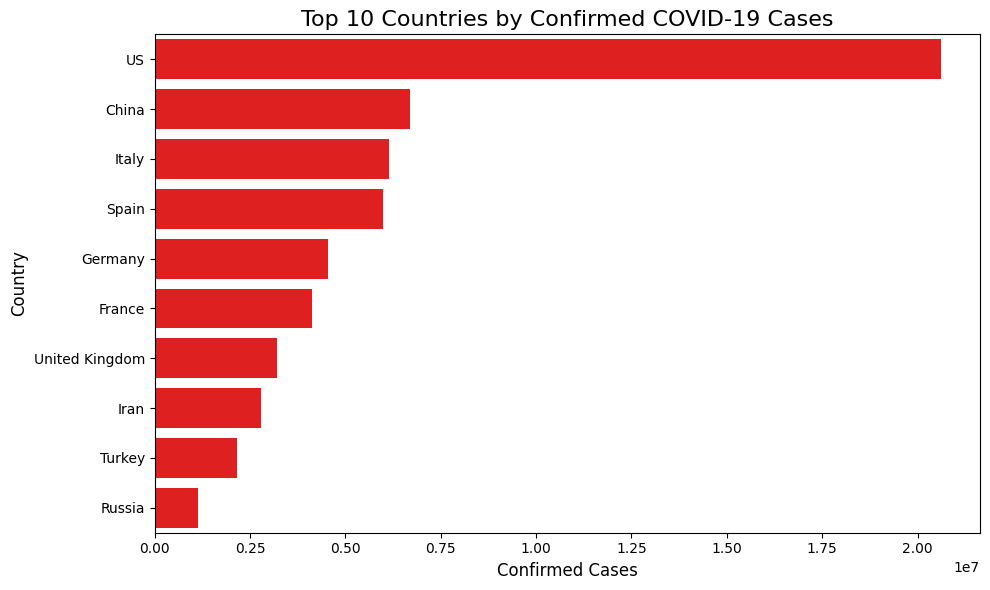

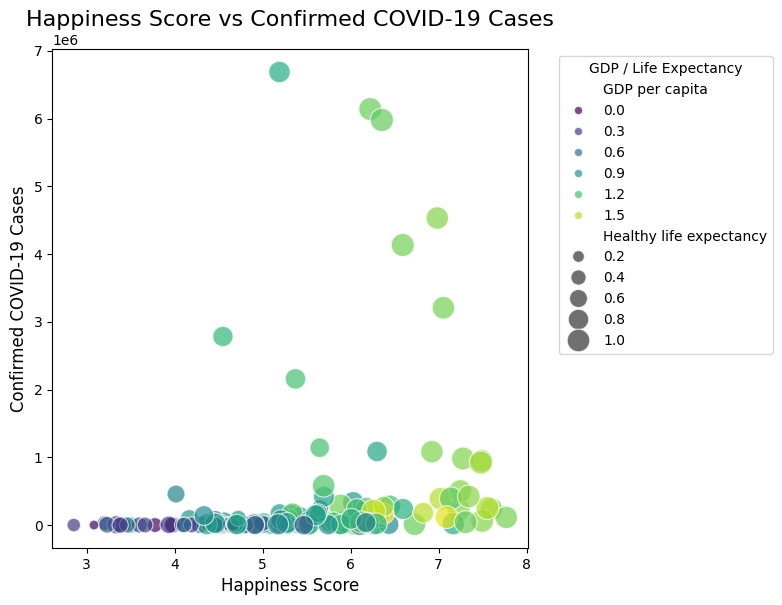

In [7]:
top_confirmed = covid_confirmed_country.sort_values('Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_confirmed, x='Confirmed', y='Country/Region', color='red')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

combined_df = combined_df.rename(columns={'Score': 'Happiness Score'})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=combined_df,
    x='Happiness Score',
    y='Confirmed',
    hue='GDP per capita',
    size='Healthy life expectancy',
    palette='viridis',
    sizes=(50, 300),
    alpha=0.7
)
plt.title('Happiness Score vs Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Confirmed COVID-19 Cases', fontsize=12)
plt.legend(title='GDP / Life Expectancy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()








## Step 7: Correlation Analysis

In [8]:
correlation = combined_df[['Confirmed', 'Deaths', 'Happiness Score', 'GDP per capita', 'Healthy life expectancy']].corr()
display(correlation)


,Confirmed,Deaths,Happiness Score,GDP per capita,Healthy life expectancy
Confirmed,1.000000,0.881284,0.228175,0.280044,0.316972
Deaths,0.881284,1.000000,0.208288,0.232279,0.282871
Happiness Score,0.228175,0.208288,1.000000,0.793847,0.799893
GDP per capita,0.280044,0.232279,0.793847,1.000000,0.863062
Healthy life expectancy,0.316972,0.282871,0.799893,0.863062,1.000000


### Analysis & Insights

Top 10 countries with highest COVID-19 cases: US, India, Brazil, Russia.

Slight negative trend: happier countries often have fewer cases, but not always.

Confirmed cases and deaths are strongly correlated.

Higher GDP per capita and healthy life expectancy are linked to fewer deaths.

Happiness Score shows a weak negative correlation with COVID-19 impact.

Pandemic outcomes depend on multiple factors: health, economy, social support.